In [17]:
import numpy as np
import pandas as pd 
import glob 
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import random
from sklearn.metrics import mean_squared_error, root_mean_squared_error


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from Math_From_Scratch import regression ,error_metrics, activation

In [30]:
datasets_path = glob.glob(r'..\data\*.csv')

csv_files = {
    path.split("\\")[-1][:-4]: path
    for path in datasets_path
}

WINDOW_SIZE = 5

df = pd.read_csv(csv_files['dehliclimate'])
df['date'] = pd.to_datetime(df['date'])

features = df.drop(columns=['meantemp','date']).columns
all_metrics = df.drop(columns=['date']).columns

df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_of_week
df['year'] = df['date'].dt.year


target = ["meantemp"]

X = df[features]
y = df[target]

val_size = 150

X_val = X[-val_size:]
y_val = y[-val_size:]
X_train = X[:-val_size]
y_train = y[:-val_size]


## Gradient Descent Update Rule

**Given:**

* **Learning rate:** $\alpha$

* **Cost function:** $J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2$

**Gradients:**

* **Partial derivative with respect to $w_j$:**
    $$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \cdot x_j^{(i)}$$

* **Partial derivative with respect to $b$:**
    $$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$

**Update rules:**

The parameters $w_j$ and $b$ are updated iteratively using the following rules:

$$w_j := w_j - \alpha \cdot \frac{\partial J}{\partial w_j} \quad \text{and} \quad b := b - \alpha \cdot \frac{\partial J}{\partial b}$$

**Explanation:**

* The update rule for each weight $w_j$ involves subtracting the product of the learning rate ($\alpha$) and the partial derivative of the cost function with respect to that weight. This moves the weight in the direction that reduces the cost.

* Similarly, the update rule for the bias $b$ involves subtracting the product of the learning rate ($\alpha$) and the partial derivative of the cost function with respect to the bias. This adjusts the bias to minimize the cost.

* The learning rate $\alpha$ controls the step size of each update. A smaller $\alpha$ leads to smaller steps and potentially slower convergence, while a larger $\alpha$ can lead to larger steps and faster convergence but risks overshooting the minimum.

In [25]:
X_train

,humidity,wind_speed,meanpressure
0,84.500000,0.000000,1015.666667
1,92.000000,2.980000,1017.800000
2,87.000000,4.633333,1018.666667
3,71.333333,1.233333,1017.166667
4,86.833333,3.700000,1016.500000
...,...,...,...
1307,83.133333,4.700000,1000.666667
1308,84.250000,5.912500,999.125000
1309,72.125000,6.375000,310.437500
1310,63.562500,5.450000,998.500000


In [100]:
W_SIZE = len(list(features))

weights = np.array([])
bias = 0 #random.random()*0.001
weights = [-0.01307698, 0.01161902, 0.02491889]
#for w in range(W_SIZE):
#    weights = np.append(weights,0.0001) #np.append(weights,random.random() * 0.000001)

lr = 0.000001

m, n = X_train.shape 
x = X_train.values
y = y_train.values.reshape(len(y_train))

cost_hist = []
weight_hist = []
bias_hist = []
loss_hist = []


for epoch in range(1070):
        if np.any(np.isnan(weights)) or np.any(np.isinf(weights)):
            print("Numerical instability detected")
            break
        pred = X_train.dot(weights) + bias
        
        error = pred - y


        mse  = np.mean((pred - y)**2)
        rmse = np.sqrt(mse)
        if epoch % 100 == 0:
            print("MSE", mse)

        

        dw = (1 / m) * x.T.dot(error)
        db = np.mean(error)


        weights -= lr * dw
        bias -= lr * db

        cost_hist.append(mse)
        weight_hist.append(weights.copy())
        bias_hist.append(bias)
        loss_hist.append(rmse)

print("Weights:", weights)
print("Bias", bias)





MSE 78.75685548867506
MSE 78.63323607130731
MSE 78.51563370672115
MSE 78.40358643618384
MSE 78.29666930826284
MSE 78.19449109851256
MSE 78.0966916270138
MSE 78.00293928928667
MSE 77.9129287836044
MSE 77.82637901908545
MSE 77.7430311901842
Weights: [-0.02918615  0.02913915  0.02573728]
Bias 0.0009748480470437659


In [102]:
loss_hist[len(loss_hist)-1]

8.814037821317859

In [109]:
pred_last_train = X_val.dot(weights) + bias
grad_results = y_val.copy()
grad_results['pred'] = pred_last_train
grad_results['residual'] = y_val.iloc[:,0] - grad_results['pred']
val_rmse = root_mean_squared_error(grad_results['meantemp'],grad_results['pred'])

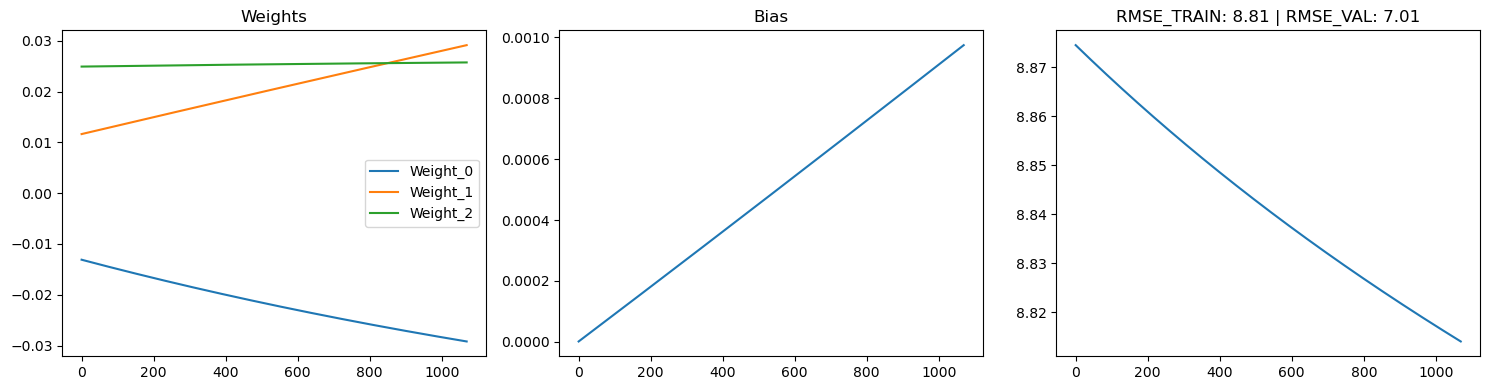

In [116]:
fig, ax =plt.subplots(1,3 , figsize=(15,4))
ax[0].set_title("Weights")
for w in range(W_SIZE):
    ax[0].plot([entry[w] for entry in weight_hist], label=f'Weight_{w}')
ax[0].legend()

ax[1].set_title("Bias")
ax[1].plot(np.arange(len(loss_hist)),bias_hist)
ax[2].set_title(f"RMSE_TRAIN: {round(loss_hist[len(loss_hist)-1],2)} | RMSE_VAL: {round(val_rmse,2)}")
ax[2].plot(np.arange(len(loss_hist)),loss_hist)
plt.tight_layout()
plt.show()

In [89]:
y_pred, intercept , coef = regression.multiple_regression(X_train,y_train, return_params=True) 

result_df = y_train[target]
result_df['y_pred'] = y_pred 

error_metrics.MSE(result_df[target].values,result_df['y_pred'].values)

array([35.56216615])